# Working with Simulations

## This is a exercice notebook that will teach you how to work with simulations and to compute large scale structure observables

This notebook assumes that you have installed halo tools and the Bolshoi catalog along with a downsampled version of the DM particles. See halotools.ipynb
This notebook draws from a tutorial given by A. Hearin at KITP in 2017 as well as from examples posted on the halotools documentation page.

In [5]:
# This notebook assumes you have version 0.5
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import halotools
print(halotools.__version__)

0.5


## What is the NFW concentration of a Milky Way halo?

In [6]:
# read in the Bolshoi catalog
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname = 'bolshoi', redshift = 0)

In [7]:
# Select central galaxies (halo_upid=-1)
milky_way_mask = ((halocat.halo_table['halo_upid'] == -1) & 
                  (halocat.halo_table['halo_mpeak'] > 1e12) & 
                  (halocat.halo_table['halo_mpeak'] < 2e12)
                  )

In [8]:
milky_way_halos = halocat.halo_table[milky_way_mask]

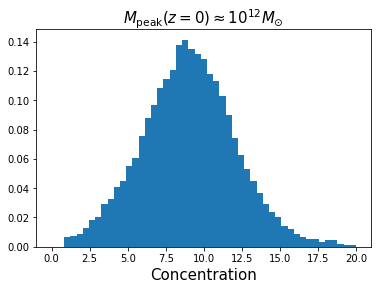

In [9]:
fig, ax = plt.subplots(1, 1)

__=ax.hist(milky_way_halos['halo_nfw_conc'],
           bins = np.linspace(0, 20, 50), normed=True)
xlabel = ax.set_xlabel('Concentration', size=15)
title = ax.set_title(r'$M_{\rm peak}(z=0)\approx10^{12}M_{\odot}$', size=15)

## Populating halo catalogs with mock galaxies 

Halotools ships with a handful of pre-built galaxy-halo models, each of which is an implementation of some specific publication in the literature. 

Read this page <a href="http://halotools.readthedocs.io/en/latest/quickstart_and_tutorials/tutorials/model_building/preloaded_models/index.html"> describing preloaded modules</a>
    

We'll first start with a  <a href="http://halotools.readthedocs.io/en/latest/api/halotools.empirical_models.PrebuiltSubhaloModelFactory.html#halotools.empirical_models.PrebuiltSubhaloModelFactory.prebuilt_model_nickname_list"> subhalo model.</a>

There model uses one-to-one mapping between stellar mass and subhalo mass governed by a parameterized form for the stellar-to-halo-mass relation (SMHM).

In [10]:
# This is an abundance matching model, hence the name 'subhalo'

from halotools.empirical_models import PrebuiltSubhaloModelFactory
model = PrebuiltSubhaloModelFactory('behroozi10', redshift=0)

All Halotools models have a `populate_mock` method that creates a Monte Carlo realization of a galaxy population based on the model. The syntax is the same regardless of the features of the model. 

In [11]:
model.populate_mock(halocat)

Calling the `populate_mock` method creates a `mock` attribute. You can access the galaxies in the mock via the `galaxy_table` attribute:

In [12]:
print(model.mock.galaxy_table[0:9])

halo_vz halo_mvir halo_upid  halo_z ...   vy      vz   galid stellar_mass
------- --------- --------- ------- ... ------ ------- ----- ------------
 -82.51 1.643e+14        -1  17.713 ... -34.49  -82.51     0  7.08381e+10
-132.11 1.589e+14        -1 39.9112 ... 264.96 -132.11     1  1.16708e+11
 -61.29 1.144e+14        -1 9.54759 ... 104.38  -61.29     2  1.41294e+11
 423.44 9.709e+13        -1 6.51834 ...  78.85  423.44     3  2.63836e+11
 179.34 8.527e+13        -1 17.8252 ... 238.52  179.34     4  9.54485e+10
-187.27 8.426e+13        -1 22.2927 ... 186.67 -187.27     5  1.36929e+11
-386.58 8.357e+13        -1 33.6698 ... -77.55 -386.58     6  7.11529e+10
  64.62 7.795e+13        -1 41.8451 ... 179.51   64.62     7  2.35163e+11
-397.53 7.284e+13        -1 38.4724 ... 239.24 -397.53     8  1.14307e+11


## What is the stellar mass of a Milky Way halo?

In [22]:
milky_way_central_mask = ((model.mock.galaxy_table['halo_upid'] == -1) & 
                  (model.mock.galaxy_table['halo_mpeak'] > 1e12) & 
                  (model.mock.galaxy_table['halo_mpeak'] < 2e12)
                  )
milky_way_centrals = model.mock.galaxy_table[milky_way_central_mask]

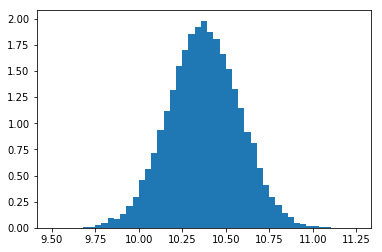

In [23]:
fig, ax = plt.subplots(1, 1)

__=ax.hist(np.log10(milky_way_centrals['stellar_mass']), 
           bins = np.linspace(9.5, 11.25, 50), normed=True)

## Plot the stellar to halo mass relation

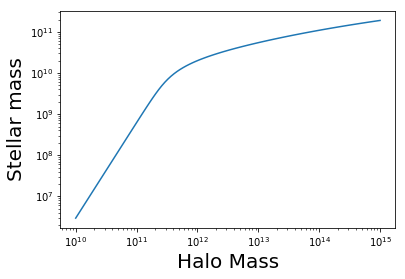

In [24]:
fig, ax = plt.subplots(1, 1)

ax.loglog()

x = np.logspace(10, 15, 100)
y = model.mean_stellar_mass(prim_haloprop = x)

__=ax.plot(x, y, label = 'Behroozi10')

xlabel = ax.set_xlabel('Halo Mass', size=20)
ylabel = ax.set_ylabel('Stellar mass', size=20)

## Add other models to the Figure

** HOMEWORK **

1) Read about these models in the <a href="http://halotools.readthedocs.io/en/latest/quickstart_and_tutorials/tutorials/model_building/preloaded_models/index.html"> documentation </a>

* Leauthaud11
* Zu and Mandelbaum 2015

2) Add  these two other models to the stellar to halo mass figure:



/home/brian/.local/lib/python3.6/site-packages/halotools/empirical_models/factories/prebuilt_model_factory.py:258: UserWarning: This particular model is still being tested in collaboration with Ying Zu.
If you need to use this prebuilt model for science, 
you will either need to test it yourself 
or wait for the Halotools developers to finish science verification.

  warn(under_development_warning.format("Ying Zu"))


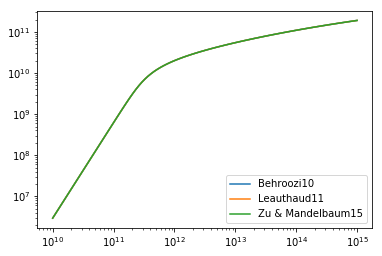

In [31]:
# A HOD MODEL constructed from lensing, clustering, and the galaxy SMF based on COSMOS data
from halotools.empirical_models import PrebuiltHodModelFactory
plt.loglog(x, model.mean_stellar_mass(prim_haloprop = x), label = "Behroozi10")

model2 = PrebuiltHodModelFactory('leauthaud11')
model2.populate_mock(halocat)
plt.loglog(x, model2.mean_stellar_mass_centrals(prim_haloprop = x), label = "Leauthaud11")


model3 = PrebuiltHodModelFactory('zu_mandelbaum15')
model3.populate_mock(halocat)
plt.loglog(x, model2.mean_stellar_mass_centrals(prim_haloprop = x), label = "Zu & Mandelbaum15")
plt.legend()

In [13]:
# Your code goes here ....

## Calculating two-point clustering for three galaxy samples

Halotools can be used to compute a range of different types of correlations functions, as well as the galaxy galaxy lensing observable $\Delta\Sigma$. Examples of some of the different types of correlation functions that can be computed can be found <a href="https://halotools.readthedocs.io/en/latest/quickstart_and_tutorials/tutorials/catalog_analysis/galcat_analysis/index.html">HERE.</a>

In [32]:
from halotools.mock_observables import tpcf, return_xyz_formatted_array

In [34]:
# Select three different galaxy samples
mask1 = ((model.mock.galaxy_table['stellar_mass'] > 5e9) & 
         (model.mock.galaxy_table['stellar_mass'] < 1e10))
s1 = model.mock.galaxy_table[mask1]

# do the same for 5e10<M*<1e11 and 1e11<M*<1e12
mask2 = ((model.mock.galaxy_table['stellar_mass'] > 5e10) & 
         (model.mock.galaxy_table['stellar_mass'] < 1e11))
s2 = model.mock.galaxy_table[mask2]

# do the same for 5e10<M*<1e11 and 1e11<M*<1e12
mask3 = ((model.mock.galaxy_table['stellar_mass'] > 1e11) & 
         (model.mock.galaxy_table['stellar_mass'] < 1e12))
s3 = model.mock.galaxy_table[mask3]


In [38]:
# Halo tools needs the positions if galaxies in a particular format
pos1 = return_xyz_formatted_array(s1['x'], s1['y'], s1['z'])
pos2 = return_xyz_formatted_array(s2['x'], s2['y'], s2['z'])
pos3 = return_xyz_formatted_array(s3['x'], s3['y'], s3['z'])



# same for two other samples

In [39]:
# Make an arrange to measure the TPCF
rbins = np.logspace(-1, 1.25, 15)
r = (rbins[1:] + rbins[:-1])/2.

In [42]:
# Compute the two point correlation function
xi1 = tpcf(pos1, rbins, period = model.mock.Lbox, num_threads = 'max')
xi2 = tpcf(pos2, rbins, period = model.mock.Lbox, num_threads = 'max')
xi3 = tpcf(pos3, rbins, period = model.mock.Lbox, num_threads = 'max')

# Same for two other samples ...

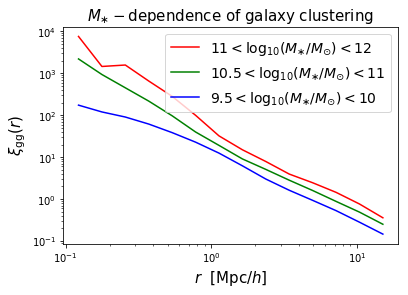

In [43]:
# Make the figure
fig, ax = plt.subplots(1, 1)

ax.loglog()

__=ax.plot(r, xi3, 
         label=r'$11 < \log_{10}(M_{\ast}/M_{\odot}) < 12$', color='red')
__=ax.plot(r, xi2, 
         label=r'$10.5 < \log_{10}(M_{\ast}/M_{\odot}) < 11$', color='green')
__=ax.plot(r, xi1, 
         label=r'$9.5 < \log_{10}(M_{\ast}/M_{\odot}) < 10$', color='blue')


xlabel = ax.set_xlabel(r'$r  $  $[{\rm Mpc}/h]$', size=15)
ylabel = ax.set_ylabel(r'$\xi_{\rm gg}(r)$', size=15)

plt.legend(loc='best', fontsize = 14)
title = ax.set_title(r'$M_{\ast}-$dependence of galaxy clustering', size=15)

## Decompose into a one and two halo term

In [55]:
from halotools.mock_observables import tpcf_one_two_halo_decomp 

In [72]:
# host halo ID for sample 1
id1 = s1['halo_upid']

In [73]:
# Decompose into one and two halo
xi_1h, xi_2h = tpcf_one_two_halo_decomp(pos1, id1, rbins, period = halocat.Lbox)

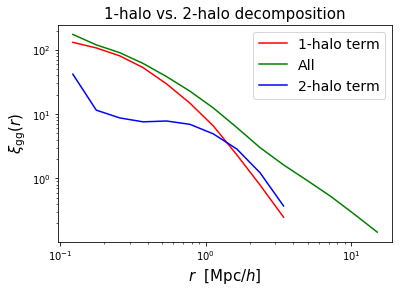

In [74]:
fig, ax = plt.subplots(1, 1)

ax.loglog()

__=ax.plot(r, xi_1h, label='1-halo term', color='red')
__=ax.plot(r, xi1, 
         label='All', color='green')
__=ax.plot(r, xi_2h, label='2-halo term', color='blue')


xlabel = ax.set_xlabel(r'$r  $  $[{\rm Mpc}/h]$', fontsize=15)
ylabel = ax.set_ylabel(r'$\xi_{\rm gg}(r)$', fontsize=15)

plt.legend(loc='best', fontsize = 14)
title = ax.set_title('1-halo vs. 2-halo decomposition', size=15)

## Compute Galaxy Galaxy Lensing

We can also compute the galaxy galaxy lensing observable $\Delta\Sigma$. Unlike galaxy clustering, recall that lensing probes the *total matter distirbution*. Hence, to compute $\Delta\Sigma$ we need the positions of dark matter particles. You downloaded these when you went through halotools.ipynb. $\Delta\Sigma$ will be computed as the correlation between the positions of galaxies and of dark matter particles.

In [77]:
from halotools.empirical_models import PrebuiltSubhaloModelFactory
from halotools.sim_manager import CachedHaloCatalog
from halotools.mock_observables import return_xyz_formatted_array
from halotools.mock_observables import delta_sigma
from halotools.mock_observables import tpcf
from astropy.table import Table

Let's'first generate a mock galaxy catalog (to get the positions of galaxies)

In [25]:
# Generate the mock catalog

In [75]:
# Now let's get the positions of galaxies in the simulation

x = model.mock.galaxy_table['x']
y = model.mock.galaxy_table['y']
z = model.mock.galaxy_table['z']

# Select different galaxy samples

#The mock_observables package such as delta_sigma take array inputs in
#a specific form: a (Npts, 3)-shape Numpy array. You can use the return_xyz_formatted_array
#convenience function for this purpose
mstar11_mask = model.mock.galaxy_table['stellar_mass'] > 1e11    
mstar11_positions = return_xyz_formatted_array(x, y, z, mask = mstar11_mask)

mstar105_mask = (model.mock.galaxy_table['stellar_mass'] > 10**10.3) & (model.mock.galaxy_table['stellar_mass'] < 10**10.7)
mstar105_positions = return_xyz_formatted_array(x, y, z, mask = mstar105_mask)

# Select Centrals
mstar105_central_mask = mstar105_mask * (model.mock.galaxy_table['halo_upid'] == -1)
mstar105_central_positions = return_xyz_formatted_array(x, y, z, mask = mstar105_central_mask)

# Select Satellites
mstar105_satellite_mask = mstar105_mask * (model.mock.galaxy_table['halo_upid'] != -1)
mstar105_satellite_positions = return_xyz_formatted_array(x, y, z, mask = mstar105_satellite_mask)

# What is the satellite fraction?
# .....
numsat = np.sum(mstar105_satellite_mask)
numtot = np.sum(mstar105_mask)
satfrac = numsat/numtot
print(satfrac)




0.192695393477


In [27]:
# Ok, let's now get the positions of DM particles

In [78]:
# We are reading in the DM particle manually because of an issue with HaloTools and python 3 ....
ptcl_table = Table.read('/home/brian/.astropy/cache/halotools/particle_catalogs/bolshoi/hlist_1.00035.particles.halotools_v0p4.hdf5',path='data')

# These are expected in units of Mpc
x = ptcl_table['x']
y = ptcl_table['y']
z = ptcl_table['z']

# Format the array for halotools
particle_positions = return_xyz_formatted_array(x, y, z)

# We also need to specify the size of the box
Lbox = 250.0   # 250/h
period = np.array([Lbox,Lbox,Lbox])

# particle mass
particle_mass = 1.35e+8

# remember that we are not using all the DM particles
# Here is how much the catalog has been downsampled
# This simulation has 2048^3 particles
downsampling_factor = (2048**3)/float(len(particle_positions))
print("downsampling factor", downsampling_factor)

downsampling factor 8589.934592


In [79]:
# Bins in which to compute Delta Sigma
# In units of MPC
rp_bins = np.logspace(-1, 1, 15)

rp, result_mstar11_in_mpc = delta_sigma(mstar11_positions, particle_positions, 
                                        particle_mass, downsampling_factor, rp_bins, period)

#

rp, result_mstar105_in_mpc = delta_sigma(mstar105_positions, particle_positions, 
                                        particle_mass, downsampling_factor, rp_bins, period)

rp, result_mstar105_central_in_mpc = delta_sigma(mstar105_central_positions, particle_positions, 
                                        particle_mass, downsampling_factor, rp_bins, period)

rp, result_mstar105_satellite_in_mpc = delta_sigma(mstar105_satellite_positions, particle_positions, 
                                        particle_mass, downsampling_factor, rp_bins, period)


#rp, result_mstar11_in_mpc = delta_sigma(mstar11_positions, particle_positions,
#                    particle_masses, downsampling_factor,
#                    rp_bins, period, cosmology=halocat.cosmology, num_threads='max')

#rp, result_mstar105_in_mpc = delta_sigma(mstar105_positions, particle_positions,
#                    particle_masses, downsampling_factor,
#                    rp_bins, period, cosmology=halocat.cosmology, num_threads='max')

#rp, result_mstar105_central_in_mpc = delta_sigma(mstar105_central_positions, particle_positions,
#                    particle_masses, downsampling_factor,
#                    rp_bins, period, cosmology=halocat.cosmology, num_threads='max')

#rp, result_mstar105_satellite_in_mpc = delta_sigma(mstar105_satellite_positions, particle_positions,
#                    particle_masses, downsampling_factor,
#                    rp_bins, period, cosmology=halocat.cosmology, num_threads='max')

All Halotools length units are comoving and in Mpc/h. However, the conventional units to plot $\Delta\Sigma$ are hMsun/pc^2. So now we convert units and plot the results.

In [80]:
length_unit_conversion = 1e6
result_mstar11_in_pc = result_mstar11_in_mpc/length_unit_conversion**2
result_mstar105_in_pc = result_mstar105_in_mpc/length_unit_conversion**2
result_mstar105_satellite_in_pc = result_mstar105_satellite_in_mpc/length_unit_conversion**2
result_mstar105_central_in_pc = result_mstar105_central_in_mpc/length_unit_conversion**2

(array([  1.00000000e-02,   1.00000000e-01,   1.00000000e+00,
          1.00000000e+01,   1.00000000e+02,   1.00000000e+03,
          1.00000000e+04]), <a list of 7 Text yticklabel objects>)

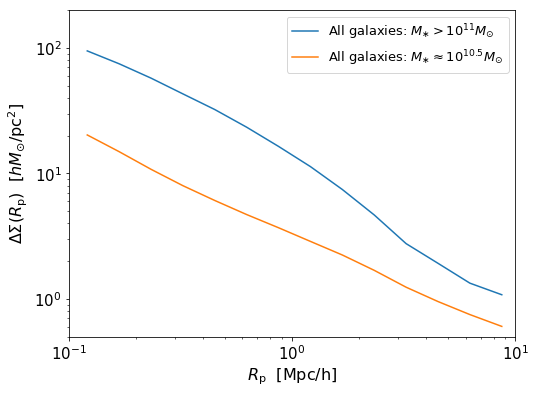

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

__=plt.loglog()

__=ax.plot(rp, result_mstar11_in_pc, label=r'All galaxies: $M_{\ast} > 10^{11}M_{\odot}$')
__=ax.plot(rp, result_mstar105_in_pc, label=r'All galaxies: $M_{\ast} \approx 10^{10.5}M_{\odot}$')
#what is fsat supposed to be?
#__=ax.plot(rp, result_mstar105_satellite_in_pc*fsat, label=r'Satellites: $M_{\ast} \approx 10^{10.5}M_{\odot}$')
#__=ax.plot(rp, result_mstar105_central_in_pc*(1-fsat), label=r'Centrals: $M_{\ast} \approx 10^{10.5}M_{\odot}$')

__=ax.set_xlim(xmin = 0.1, xmax = 10)
__=ax.set_ylim(ymin = 0.5, ymax = 200)

__=ax.set_xlabel(r'$R_{\rm p} $  $\rm{[Mpc / h]}$', fontsize=16)
__=ax.set_ylabel(r'$\Delta\Sigma(R_{\rm p})$  $[h M_{\odot} / {\rm pc}^2]$', fontsize=16)
__=ax.legend(loc='best', fontsize=13)
__=plt.xticks(fontsize=15); plt.yticks(fontsize=15)

**NOTE**: If you are using a hydro simulation, and have the positions of stellar and gas particles, the latest version of halo tools also enables you to compute the profiles of stars, gas, and dark matter!

## Extra

### Count Cluster satellites

In [ ]:
from halotools.utils import group_member_generator

# Select galaxies above some mass
sample_mask = model.mock.galaxy_table['stellar_mass'] > 5e9
sample = model.mock.galaxy_table[sample_mask]

sample.sort(['halo_hostid', 'halo_upid'])
gen = group_member_generator(sample, 'halo_hostid', [])

# Count number of satellites
richness = np.zeros(len(sample), dtype = int)
for istart, iend, member_props in gen:
    richness[istart:iend] = iend-istart-1
    
sample['num_satellites'] = richness

# Select parent halos with a given halo mass
cluster_mask = ((sample['halo_upid'] == -1) & 
                  (sample['halo_mpeak'] > 1e14))
clusters = sample[cluster_mask]

# Plot the number of satellites
fig, ax = plt.subplots(1, 1)

__=ax.hist(clusters['num_satellites'], bins = np.logspace(0, 2, 20))
__=ax.set_xlabel('Number of satellites', size = 15)
__=ax.set_title('Satellite counts in cluster-mass halos', size=15)